In [ ]:
# Steps involved in creating an end-to-end Machine Learning algorithm -
# (1) Importing basic libraries
# (2) Importing the data
# (3) Getting an understanding about the data with which you are working
# (4) Getting an understanding about the problem that you are trying to solve
# (5) EDA (Rigorous) -> Approximate Patterns 
# (6) Approximate Patterns -> Shortlist the probable list of ML algorithms (2-3)
# (7) Creating separate Jupyter Notebooks for pre-processing the data for 2-3 algo.
# (8) Feature Engineering
# (9) Feature Selection
# (10) Train Test Split
# (11) Training/Fitting the ML Model
# (12) Predicting from the trained model
# (13) Evaluating the model
# (14) Optimization -> If the results of model evaulation don't meet your criteria
# (15) Deploy the model into production -> ML Ops
# (16) Maintainance Work for the Model

In [1]:
# Importing important libraries
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Importing the data
df = pd.read_csv('Mall_Customers_BP.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# Getting an idea about the NULL values
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [4]:
# Checking for data types of each column
df.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [ ]:
# EDA
# (1) 56% Female, 44% Male

In [ ]:
# Data Pre-Processing Steps -
# (1) Detecting and removing outliers in the data
# (2) Scaling
# (3) Elbow Method (Finding optimal number of clustering)

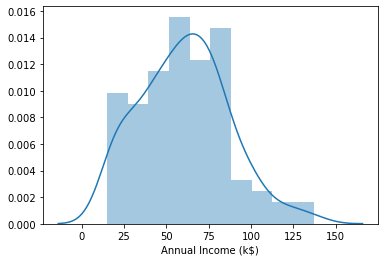

In [5]:
# Detecting outliers in Annual Income
import seaborn as sns
sns.distplot(df['Annual Income (k$)'], kde = True)

In [6]:
# Removing the Outliers fro Annual Income column
df = df[df['Annual Income (k$)'] < 125]

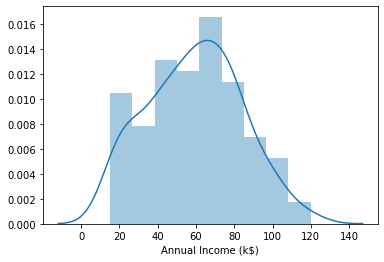

In [7]:
# Detecting outliers in Annual Income
sns.distplot(df['Annual Income (k$)'], kde = True)

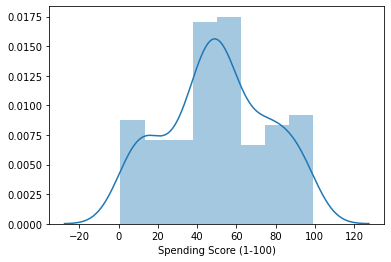

In [8]:
# Detecting outliers in Spending Score column
sns.distplot(df['Spending Score (1-100)'], kde = True)

In [ ]:
# There are no outliers present in Spending Score column.

In [9]:
# Scaling
scaler = StandardScaler()
df[['Annual Income (k$)', 'Spending Score (1-100)']] = scaler.fit_transform(df[['Annual Income (k$)', 'Spending Score (1-100)']])
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,-1.808460,-0.435233
1,2,Male,21,-1.808460,1.198529
2,3,Female,20,-1.767464,-1.718903
3,4,Female,23,-1.767464,1.042932
4,5,Female,31,-1.726467,-0.396334


In [ ]:
# Distortion/Inertia -> Compactness of a cluster

In [12]:
# Elbow Curve

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 15)

# Making a separate array file
array1 = df['Annual Income (k$)'].to_numpy()
array2 = df['Spending Score (1-100)'].to_numpy()
array = np.array(list(zip(array1, array2))).reshape(len(array1), 2)

for k in K:
    kmeanModel = KMeans(n_clusters = k)
    kmeanModel.fit(array)
    distortions.append(sum(np.min(cdist(array, kmeanModel.cluster_centers_,
                                       'euclidean'), axis = 1)) / array.shape[0])
    inertias.append(kmeanModel.inertia_)
    mapping1[k] = sum(np.min(cdist(array, kmeanModel.cluster_centers_,
                                       'euclidean'), axis = 1)) / array.shape[0]
    mapping2[k] = kmeanModel.inertia_

1 : 1.2015316793540507
2 : 1.0328767473225633
3 : 0.7522947351315306
4 : 0.6309799253911532
5 : 0.488821608070224
6 : 0.43365508051037366
7 : 0.4057759980505481
8 : 0.37769817512207976
9 : 0.3539312577482524
10 : 0.3330888631178013
11 : 0.31116240596712563
12 : 0.2997611193137569
13 : 0.28604666068366913
14 : 0.27070592688937584


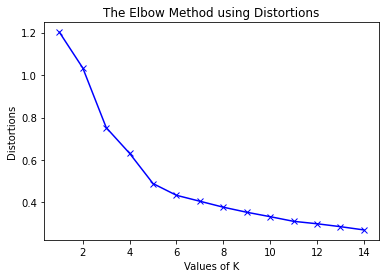

In [13]:
# Using distortions -
for key, val in mapping1.items():
    print(str(key) + ' : ' + str(val))
    
# Plot
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortions')
plt.title('The Elbow Method using Distortions')
plt.show()

1 : 391.99999999999994
2 : 258.5419516528518
3 : 154.88331010895365
4 : 103.9404732987839
5 : 57.522677883250644
6 : 48.5542005514134
7 : 41.73055944355782
8 : 34.90546111682802
9 : 30.501659277946615
10 : 26.9173234296652
11 : 23.870830969227793
12 : 21.59273774170372
13 : 20.109831251288863
14 : 18.20652276189818


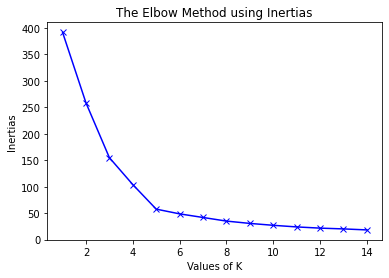

In [14]:
# Using inertias -
for key, val in mapping2.items():
    print(str(key) + ' : ' + str(val))
    
# Plot
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertias')
plt.title('The Elbow Method using Inertias')
plt.show()

In [15]:
# Training the Optimal Model and getting the centroids
data = pd.DataFrame(array, columns = ('Annual Income (k$)', 'Spending Score (1-100)'))

kmeans = KMeans(n_clusters = 5).fit(data)
centroids = kmeans.cluster_centers_
print('Centroids :\n', centroids)

Centroids :
 [[-1.34501842 -1.13879942]
 [-0.18435683 -0.00634578]
 [ 1.04195523 -1.23698675]
 [ 1.02475012  1.2500437 ]
 [-1.36867665  1.13487562]]


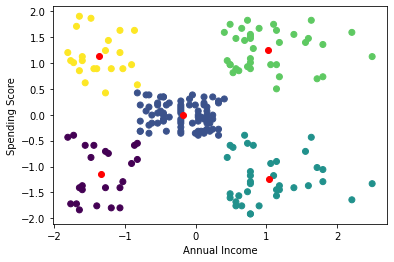

In [18]:
# Plot
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], 
            c = kmeans.labels_.astype(float))
plt.scatter(centroids[:, 0], centroids[:, 1], c = 'red')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [ ]:
# Assignment Question -
# Create seperate clusters for Male and Female members and give some business insights.